In [1]:
import xarray as xr
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# Processing and Downloading ERA5 Data

This is a guide to processing and downloading ERA5 data as provided by ARCO-ERA5 in the Google Cloud.

[Google Cloud Site](https://cloud.google.com/storage/docs/public-datasets/era5)

[ERA5 Site](https://www.ecmwf.int/en/forecasts/dataset/ecmwf-reanalysis-v5)

# Table of Contents

1. [Currently Available Datasets](#Currently-Available-Datasets)
2. [Processing Data](#Processing-Data)
3. [Working with the Data](#Working-with-the-Data)

# 1. Currently Available Datasets

The ECMWF Reanalysis v5 (ERA5) is the atmospheric reanalysis of the global climate from 1940 to the present day. ERA5 works on a 31 km scale and an hourly timestep.

The dataset we use here is ERA5 data provided by the [Analysis Ready, Cloud Optimized (ARCO) ERA5 project](https://cloud.google.com/storage/docs/public-datasets/era5), which is stored within the Google Cloud. The available dataset runs from 1980 to 2021 on an hourly timestep.

Currently available datasets are surface and single level parameters as shown under the data summary table in this [link](https://github.com/google-research/arco-era5/tree/c64c50eea267f19818f44d748289c6d284523bbf?tab=readme-ov-file#raw-cloud-optimized-data) under Single Level Reanalysis.

Pulled from ARCO-ERA5's [README](https://github.com/google-research/arco-era5/tree/c64c50eea267f19818f44d748289c6d284523bbf):

<details>
<summary>Data summary table</summary>

| name                                                       | short name | units        | docs                                                 | config                                       |
|------------------------------------------------------------|------------|--------------|------------------------------------------------------|----------------------------------------------|
| convective available potential energy                      | cape       | J kg^-1      | https://apps.ecmwf.int/codes/grib/param-db?id=59     | [era5_sfc_cape.cfg](raw/era5_sfc_cape.cfg)   |
| total column cloud ice water                               | tciw       | kg m^-2      | https://apps.ecmwf.int/codes/grib/param-db?id=79     | [era5_sfc_cape.cfg](raw/era5_sfc_cape.cfg)   |
| vertical integral of divergence of cloud frozen water flux | wiiwd      | kg m^-2 s^-1 | https://apps.ecmwf.int/codes/grib/param-db?id=162080 | [era5_sfc_cape.cfg](raw/era5_sfc_cape.cfg)   |
| 100 metre U wind component                                 | 100u       | m s^-1       | https://apps.ecmwf.int/codes/grib/param-db?id=228246 | [era5_sfc_cape.cfg](raw/era5_sfc_cape.cfg)   |
| 100 metre V wind component                                 | 100v       | m s^-1       | https://apps.ecmwf.int/codes/grib/param-db?id=228247 | [era5_sfc_cape.cfg](raw/era5_sfc_cape.cfg)   |
| sea ice area fraction                                      | ci         | (0 - 1)      | https://apps.ecmwf.int/codes/grib/param-db?id=31     | [era5_sfc_cisst.cfg](raw/era5_sfc_cisst.cfg) | 
| sea surface temperature                                    | sst        | Pa           | https://apps.ecmwf.int/codes/grib/param-db?id=34     | [era5_sfc_cisst.cfg](raw/era5_sfc_cisst.cfg) |
| skin temperature                                           | skt        | K            | https://apps.ecmwf.int/codes/grib/param-db?id=235    | [era5_sfc_cisst.cfg](raw/era5_sfc_cisst.cfg) |
| soil temperature level 1                                   | stl1       | K            | https://apps.ecmwf.int/codes/grib/param-db?id=139    | [era5_sfc_soil.cfg](raw/era5_sfc_soil.cfg)   | 
| soil temperature level 2                                   | stl2       | K            | https://apps.ecmwf.int/codes/grib/param-db?id=170    | [era5_sfc_soil.cfg](raw/era5_sfc_soil.cfg)   |
| soil temperature level 3                                   | stl3       | K            | https://apps.ecmwf.int/codes/grib/param-db?id=183    | [era5_sfc_soil.cfg](raw/era5_sfc_soil.cfg)   |
| soil temperature level 4                                   | stl4       | K            | https://apps.ecmwf.int/codes/grib/param-db?id=236    | [era5_sfc_soil.cfg](raw/era5_sfc_soil.cfg)   |
| temperature of snow layer                                  | tsn        | K            | https://apps.ecmwf.int/codes/grib/param-db?id=238    | [era5_sfc_soil.cfg](raw/era5_sfc_soil.cfg)   |
| volumetric soil water layer 1                              | swvl1      | m^3 m^-3     | https://apps.ecmwf.int/codes/grib/param-db?id=39     | [era5_sfc_soil.cfg](raw/era5_sfc_soil.cfg)   |
| volumetric soil water layer 2                              | swvl2      | m^3 m^-3     | https://apps.ecmwf.int/codes/grib/param-db?id=40     | [era5_sfc_soil.cfg](raw/era5_sfc_soil.cfg)   |
| volumetric soil water layer 3                              | swvl3      | m^3 m^-3     | https://apps.ecmwf.int/codes/grib/param-db?id=41     | [era5_sfc_soil.cfg](raw/era5_sfc_soil.cfg)   |
| volumetric soil water layer 4                              | swvl4      | m^3 m^-3     | https://apps.ecmwf.int/codes/grib/param-db?id=42     | [era5_sfc_soil.cfg](raw/era5_sfc_soil.cfg)   |
| ice temperature layer 1                                    | istl1      | K            | https://apps.ecmwf.int/codes/grib/param-db?id=35     | [era5_sfc_soil.cfg](raw/era5_sfc_soil.cfg)   |
| ice temperature layer 2                                    | istl2      | K            | https://apps.ecmwf.int/codes/grib/param-db?id=36     | [era5_sfc_soil.cfg](raw/era5_sfc_soil.cfg)   |
| ice temperature layer 3                                    | istl3      | K            | https://apps.ecmwf.int/codes/grib/param-db?id=37     | [era5_sfc_soil.cfg](raw/era5_sfc_soil.cfg)   |
| ice temperature layer 4                                    | istl4      | K            | https://apps.ecmwf.int/codes/grib/param-db?id=38     | [era5_sfc_soil.cfg](raw/era5_sfc_soil.cfg)   |
| total column cloud liquid water                            | tclw       | kg m^-2      | https://apps.ecmwf.int/codes/grib/param-db?id=78     | [era5_sfc_tcol.cfg](raw/era5_sfc_tcol.cfg)   | 
| total column rain water                                    | tcrw       | kg m^-2      | https://apps.ecmwf.int/codes/grib/param-db?id=228089 | [era5_sfc_tcol.cfg](raw/era5_sfc_tcol.cfg)   |
| total column snow water                                    | tcsw       | kg m^-2      | https://apps.ecmwf.int/codes/grib/param-db?id=228090 | [era5_sfc_tcol.cfg](raw/era5_sfc_tcol.cfg)   |
| total column water                                         | tcw        | kg m^-2      | https://apps.ecmwf.int/codes/grib/param-db?id=136    | [era5_sfc_tcol.cfg](raw/era5_sfc_tcol.cfg)   |
| total column vertically-integrated water vapour            | tcwv       | kg m^-2      | https://apps.ecmwf.int/codes/grib/param-db?id=137    | [era5_sfc_tcol.cfg](raw/era5_sfc_tcol.cfg)   |
| Geopotential	                                              | z	         | m^2 s^-2	    | https://apps.ecmwf.int/codes/grib/param-dbid=129     | [era5_sfc.cfg](raw/era5_sfc.cfg)             |  
| Surface pressure	                                          | sp	        | Pa	          | https://apps.ecmwf.int/codes/grib/param-db?id=134    | [era5_sfc.cfg](raw/era5_sfc.cfg)             |  
| Total column vertically-integrated water vapour            | tcwv	      | kg m^-2      | https://apps.ecmwf.int/codes/grib/param-db?id=137    | [era5_sfc.cfg](raw/era5_sfc.cfg)             |  
| Mean sea level pressure	                                   | msl	       | Pa	          | https://apps.ecmwf.int/codes/grib/param-db?id=151    | [era5_sfc.cfg](raw/era5_sfc.cfg)             |  
| Total cloud cover                                          | tcc	       | (0 - 1)	     | https://apps.ecmwf.int/codes/grib/param-db?id=164    | [era5_sfc.cfg](raw/era5_sfc.cfg)             |  
| 10 metre U wind component	                                 | 10u	       | m s^-1	      | https://apps.ecmwf.int/codes/grib/param-db?id=165    | [era5_sfc.cfg](raw/era5_sfc.cfg)             |  
| 10 metre V wind component	                                 | 10v	       | m s^-1	      | https://apps.ecmwf.int/codes/grib/param-db?id=166    | [era5_sfc.cfg](raw/era5_sfc.cfg)             |  
| 2 metre temperature	                                       | 2t	        | K	           | https://apps.ecmwf.int/codes/grib/param-db?id=167    | [era5_sfc.cfg](raw/era5_sfc.cfg)             |  
| 2 metre dewpoint temperature	                              | 2d	        | K	           | https://apps.ecmwf.int/codes/grib/param-db?id=168    | [era5_sfc.cfg](raw/era5_sfc.cfg)             |  
| Low cloud cover	                                           | lcc	       | (0 - 1)	     | https://apps.ecmwf.int/codes/grib/param-db?id=186    | [era5_sfc.cfg](raw/era5_sfc.cfg)             |  
| Medium cloud cover	                                        | mcc	       | (0 - 1)	     | https://apps.ecmwf.int/codes/grib/param-db?id=187    | [era5_sfc.cfg](raw/era5_sfc.cfg)             |  
| High cloud cover	                                          | hcc	       | (0 - 1)	     | https://apps.ecmwf.int/codes/grib/param-db?id=188    | [era5_sfc.cfg](raw/era5_sfc.cfg)             |  
| 100 metre U wind component                                 | 100u       | m s^-1	      | https://apps.ecmwf.int/codes/grib/param-db?id=228246 | [era5_sfc.cfg](raw/era5_sfc.cfg)             |  
| 100 metre V wind component                                 | 100v	      | m s^-1	      | https://apps.ecmwf.int/codes/grib/param-db?id=228247 | [era5_sfc.cfg](raw/era5_sfc.cfg)             |

</details>

# 2. Processing Data

Data processing is done using the script `ERA5_processor.py`. 

You will need fsspec, xarray, scipy, numpy, and argparse to run this script. 

This file processes ERA5 data from ARCO-ERA5 data into an xarray dataset and interpolates the ERA5 data using a Delaunay triangulation. This dataarray is then saved to a NetCDF file. This script is written to focus on Illinois and surrounding areas, but it can be altered to focus on a different region.

Inputs:
- `variable` (str) - The variable you want.
- `year_start` (int) - The first year you want to request.
- `year_end` (int) - The last year you want to request (inclusive)
- `out_path` (str) - Directory you'd like to save the dataset in
    
Example code:

```
python ERA5_processor.py --variable="lcc" --year_start="2019" --year_end="2019" --out_path="."
```

results in a file in your current directory called `ERA5_IL_lcc_2019-2019_[today's date].nc`.

# 3. Working with the Data

Let's try loading `ERA5_IL_lcc_2019-2019_2024-12-06.nc`!

In [2]:
lcc_data = xr.open_dataarray('./ERA5_IL_lcc_2019-2019_2024-12-06.nc')
lcc_data.load()

<xarray.DataArray (time: 8760, lon: 29, lat: 33)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan, 0.57356468, 0.73601221, ..., 0.99818871,
         1.        ,        nan],
        [       nan, 0.41836159, 0.54273262, ..., 0.99619218,
         1.        ,        nan],
        ...,
        [       nan, 0.16936136, 0.08788851, ..., 1.        ,
         1.        ,        nan],
        [       nan,        nan,        nan, ..., 1.        ,
         1.        ,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan, 0.88714799, 0.78269667, ..., 0.99818871,
         1.        ,        nan],
        [       nan, 0.79302585, 0.65841601, ..., 0.99619218,
         1.        ,        nan],
...
        [       nan, 0.0173649 , 0.08068248, ..., 0.96285488,
         0.96285488,        nan],
        [       nan,        nan,        nan, ..., 0.92783259,
         0.95057582,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan, 0.        , 0.        , ..., 0.0675763 ,
         0.22521609,        nan],
        [       nan, 0.        , 0.        , ..., 0.05163649,
         0.19385636,        nan],
        ...,
        [       nan, 0.00434454, 0.06707201, ..., 0.98513968,
         0.98513968,        nan],
        [       nan,        nan,        nan, ..., 0.97112863,
         0.96135229,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]])
Coordinates:
  * time     (time) datetime64[ns] 2019-01-01 ... 2019-12-31T23:00:00
  * lon      (lon) float64 267.2 267.4 267.7 267.9 ... 273.3 273.5 273.8 274.0
  * lat      (lat) float64 36.0 36.23 36.47 36.7 36.94 ... 42.8 43.03 43.27 43.5

This dataset has low cloud cover (lcc) with the absence of clouds indicated by 0 and a grid box being completely covered by clouds indicated by 1. 2019-2019 indicates that this dataset is from 2019-01-01 to 2019-12-31.

This dataset has 3 dimensions.
- `lon` - Longitude. To cover Illinois, it extends from roughly 267.2 to 274.0 lon with a resolution of 0.2 degrees.
- `lat` - Latitude. This extends from 36.0 to 43.5 lat with a resolution of about 0.2 degrees as well.
- `time` - This covers the date range we gave it over an hourly resolution.

We can plot the change in clouds over the course of a day hour by hour.

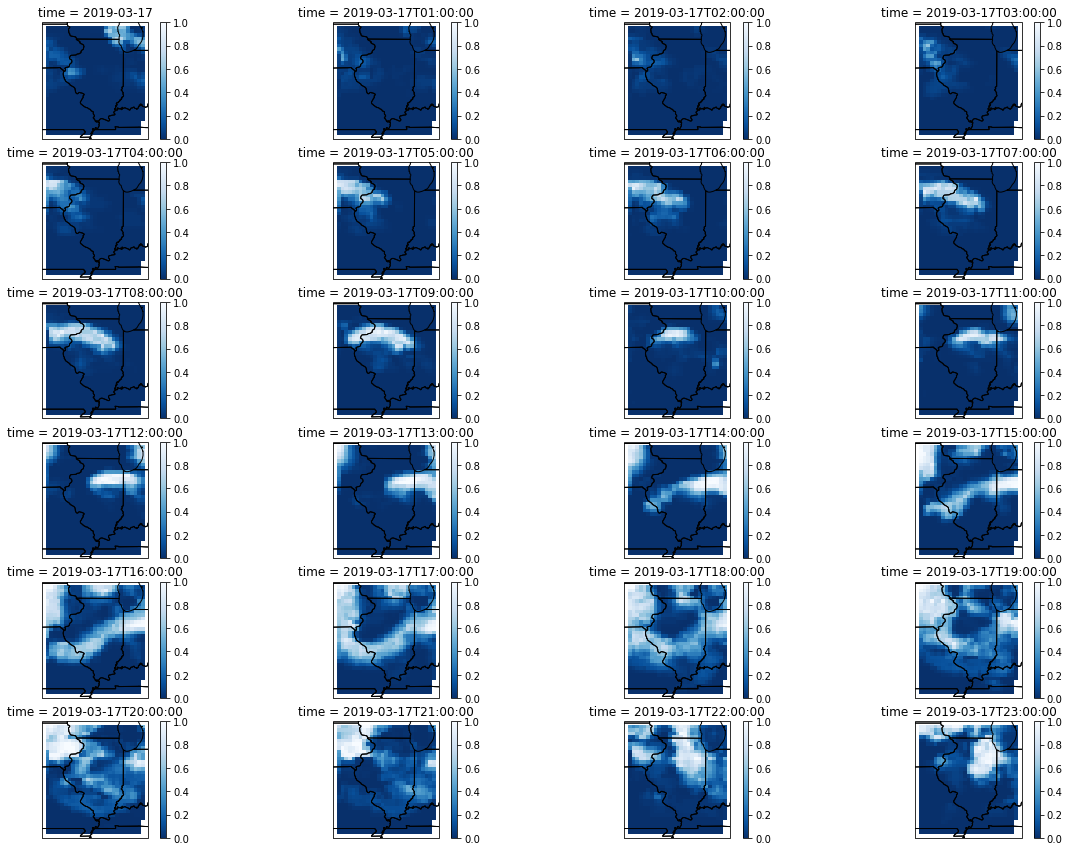

In [5]:
plt.rcParams['figure.figsize'] = [20, 15]
fig, ax = plt.subplots(6,4, subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
ax = ax.flatten()

for time in range(0,24):
    if time < 10:
        time_str = '0' + str(time)
    else:
        time_str = time
    datetime = '2019-03-17T' + str(time_str)
    lcc_data.sel(time=datetime).plot.pcolormesh(x='lon', y='lat', ax=ax[time], 
                                                transform=ccrs.PlateCarree(), vmin=0, vmax=1, cmap='Blues_r')
    ax[time].add_feature(cfeature.STATES)